In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Problem Statement
For the task of Metro Operations Optimization, we will aim to identify the key areas where adjustments in train frequencies could significantly improve the service levels, reduce wait times, and alleviate overcrowding.

In [2]:
# load all the data files
agency = pd.read_csv('agency.txt')
calendar = pd.read_csv('calendar.txt')
routes = pd.read_csv('routes.txt')
shapes = pd.read_csv('shapes.txt')
stop_times = pd.read_csv('stop_times.txt')
stops = pd.read_csv('stops.txt')
trips = pd.read_csv('trips.txt')

# showing the first few rows and the structure of each dataframe
data_overviews = {
    "agency": agency.head(),
    "calendar": calendar.head(),
    "routes": routes.head(),
    "shapes": shapes.head(),
    "stop_times": stop_times.head(),
    "stops": stops.head(),
    "trips": trips.head()
}


# Data Cleaning 

In [3]:
# Removal of Unwanted Columns from every dataframe

In [4]:
agency

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


In [5]:
agency.drop(columns=['agency_lang','agency_fare_url','agency_email','agency_phone'],inplace=True)

In [6]:
agency

,agency_id,agency_name,agency_url,agency_timezone
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata


In [7]:
routes.head(1)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
routes.drop(columns=['agency_id','route_desc','route_url','route_color','route_text_color','route_sort_order','continuous_pickup','continuous_drop_off'],inplace=True)

In [9]:
routes.head(1)

,route_id,route_short_name,route_long_name,route_type
0,33,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,1


In [10]:
stop_times.head(1)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.0,1,NaN,NaN


In [11]:
stop_times.drop(columns=['stop_headsign','continuous_pickup','continuous_drop_off'],inplace=True)

In [12]:
stop_times.head(1)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,05:28:08,05:28:28,21,0,0,0,0.0,1


In [13]:
stops.head(1)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495


In [14]:
stops.drop(columns=['stop_code','stop_desc'],inplace=True)

In [15]:
stops.head(1)

,stop_id,stop_name,stop_lat,stop_lon
0,1,Dilshad Garden,28.675991,77.321495


In [16]:
trips.head(1)

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0


In [17]:
trips.drop(columns=['trip_headsign','trip_short_name','direction_id','block_id','shape_id'],inplace=True)

In [18]:
trips.head(1)

,route_id,service_id,trip_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,0,0


In [19]:
calendar.head(1)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231


In [20]:
routes.head(1)

,route_id,route_short_name,route_long_name,route_type
0,33,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,1


In [21]:
stop_times.head(1)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,05:28:08,05:28:28,21,0,0,0,0.0,1


In [22]:
stops.head(1)

,stop_id,stop_name,stop_lat,stop_lon
0,1,Dilshad Garden,28.675991,77.321495


In [23]:
trips.head(1)

,route_id,service_id,trip_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,0,0


In [24]:
shapes.head(1)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.0


### I’ll start by plotting the geographical paths of different routes on a map to visualize how the Delhi Metro covers the area:

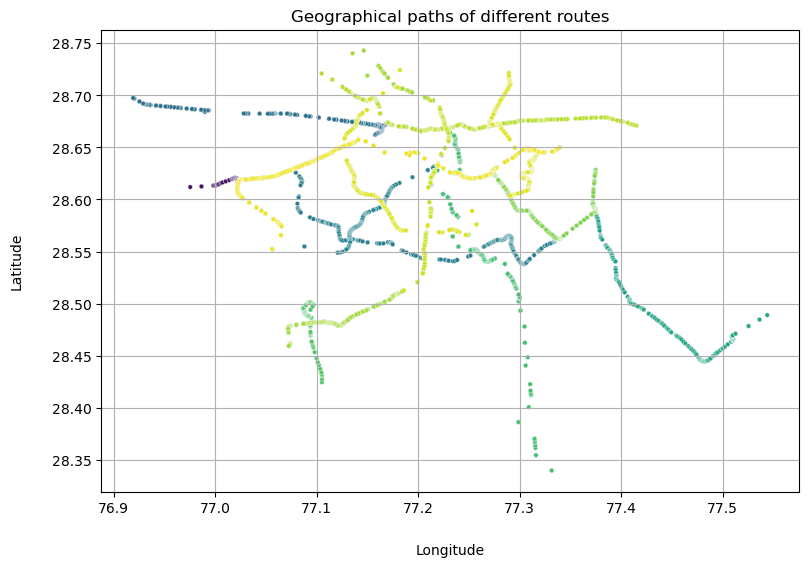

In [25]:
plt.figure(figsize=(9,6))

sns.scatterplot(data=shapes,x='shape_pt_lon',y='shape_pt_lat',hue='shape_id',palette='viridis',legend=False,s=10)

plt.xlabel('Longitude',labelpad=20)
plt.ylabel('Latitude',labelpad=20)
plt.title('Geographical paths of different routes')
plt.grid(True)
plt.show()

### Scatter Plot Summary
Points higher on the plot indicate locations further north, while points lower indicate locations further south. Points towards the right of the plot represent locations further east, and points towards the left represent locations further west

### Next, I will examine the frequency and scheduling of trips across different days of the week by analyzing the calendar and trip data:

In [26]:
trips.head(1)

,route_id,service_id,trip_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,0,0


In [27]:
calendar.head(1)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231


In [28]:
# merge trips with calendar to include the day of operation information
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

In [71]:
trips_calendar

,route_id,service_id,trip_id,wheelchair_accessible,bikes_allowed,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,0,weekday,0,0,0,1,1,1,1,1,0,0,20190101,20251231
1,0,weekday,1,0,0,1,1,1,1,1,0,0,20190101,20251231
2,0,weekday,10,0,0,1,1,1,1,1,0,0,20190101,20251231
3,0,weekday,100,0,0,1,1,1,1,1,0,0,20190101,20251231
4,2,weekday,1000,0,0,1,1,1,1,1,0,0,20190101,20251231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,18,weekday,9487,0,0,1,1,1,1,1,0,0,20190101,20251231
5434,18,weekday,9488,0,0,1,1,1,1,1,0,0,20190101,20251231
5435,18,weekday,9489,0,0,1,1,1,1,1,0,0,20190101,20251231
5436,18,weekday,9490,0,0,1,1,1,1,1,0,0,20190101,20251231


In [30]:
# count the number of trips per day of the week
data = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()

#This gives the ouput in a pandas series  

In [31]:
data

monday       5379
tuesday      5379
wednesday    5379
thursday     5379
friday       5379
saturday       59
sunday          0
dtype: int64

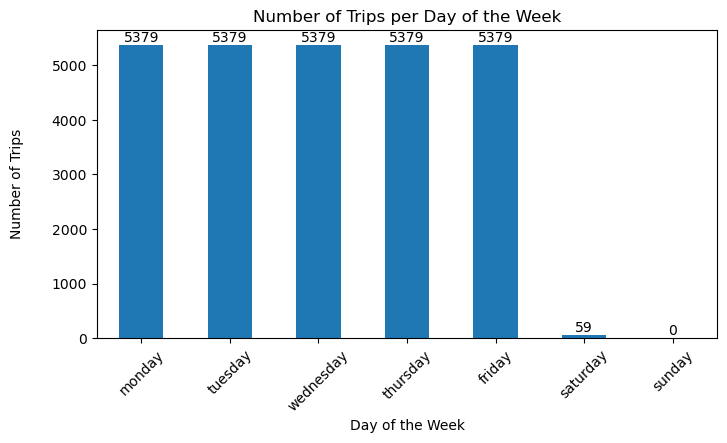

In [79]:
plt.figure(figsize=(8,4))
ax = data.plot(kind='bar') 
ax.bar_label(ax.containers[0])


#.plot is function of pandas
#We can also use seaborn only will have to use x=data.index,y=data.values to plot beacuse it is a pandas series not a dataframe

plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips',labelpad=20)
plt.xticks(rotation=45)

plt.show()

### Summary of the Above Graph 

## To further analyze the connectivity and effectiveness of the route strategy, I will analyze the distribution and connectivity of stops:


In [33]:
stops.head(1)

,stop_id,stop_name,stop_lat,stop_lon
0,1,Dilshad Garden,28.675991,77.321495


In [34]:
stops['stop_id'].count() # There are Total 262 Stops in delhi metro service 

262

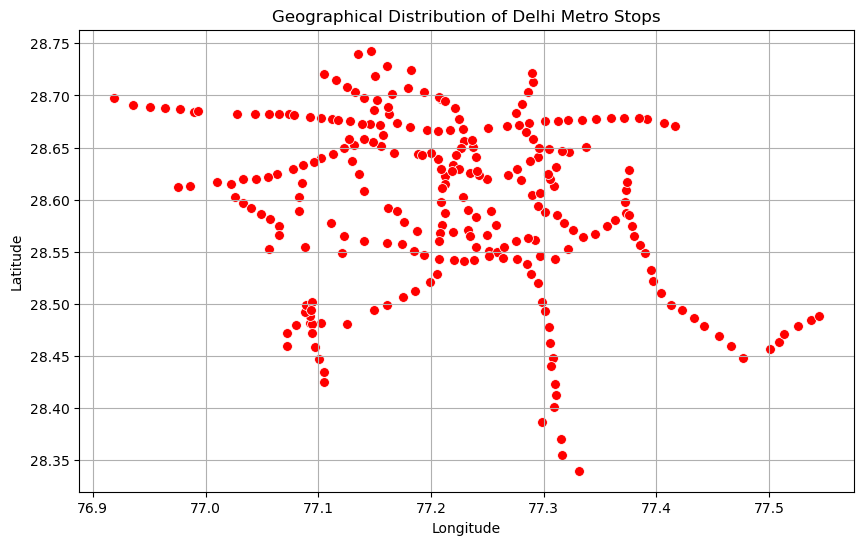

In [35]:
plt.figure(figsize=(10,6))


sns.scatterplot(data=stops,x='stop_lon',y='stop_lat',s=50,color='red')
plt.title('Geographical Distribution of Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### Summary of the above graph: 

The scatter plot above shows the geographical distribution of Delhi Metro stops. Each red dot represents a metro stop, and their distribution across the map illustrates how the stops cover different areas of Delhi.
From the plot, we can see a widespread distribution, suggesting that the Delhi Metro provides good spatial coverage, allowing access to a broad area and facilitating efficient travel across the city.

In summary, the presence of denser clusters among evenly spread transit stops indicates areas of higher demand for transit services and central hubs that facilitate efficient movement and connectivity within a city or region.

### Now, let’s analyze the route complexity. I will analyze how many routes pass through each stop, which can highlight key transfer points and central hubs within the Delhi Metro network: 

In summary, by analyzing how many metro routes pass through each station, one can identify key transfer points and central hubs within the Delhi Metro network. This analysis helps in understanding the network’s complexity, connectivity, and the strategic importance of specific stations in facilitating efficient and convenient travel across Delhi.

In the context of a metro or subway system, "transfer points" refer to stations where passengers can switch from one metro line or route to another. These points are crucial for facilitating seamless transitions between different parts of the metro network without requiring passengers to exit the system and re-enter at another station.

In [36]:
stop_times.head(1)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,05:28:08,05:28:28,21,0,0,0,0.0,1


In [100]:
pd.merge(stop_times,trips,on='trip_id')

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,time_interval,route_id,service_id,wheelchair_accessible,bikes_allowed
0,0,05:28:08,05:28:28,21,0,0,0,0.000,1,Early Morning,0,weekday,0,0
1,0,05:30:58,05:31:18,20,1,0,0,1202.405,1,Early Morning,0,weekday,0,0
2,0,05:33:28,05:33:48,19,2,0,0,2480.750,1,Early Morning,0,weekday,0,0
3,0,05:35:33,05:35:53,18,3,0,0,3314.936,1,Early Morning,0,weekday,0,0
4,0,05:37:53,05:38:13,17,4,0,0,4300.216,1,Early Morning,0,weekday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128429,17548,22:14:55,22:15:15,512,8,0,0,11954.803,1,Late Evening,35,weekday,0,0
128430,17548,22:17:15,22:17:35,511,9,0,0,13655.823,1,Late Evening,35,weekday,0,0
128431,17548,22:19:35,22:19:55,510,10,0,0,14878.926,1,Late Evening,35,weekday,0,0
128432,17548,22:21:55,22:22:15,509,11,0,0,16252.104,1,Late Evening,35,weekday,0,0


In [37]:
trips.head(1)

,route_id,service_id,trip_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,0,0


In [99]:
routes.head(1)

,route_id,route_short_name,route_long_name,route_type
0,33,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,1


In [39]:
# merge stops with stop_times to link each stop with trips, and then merge with trips to get route information
stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')

In [40]:
stops_with_routes.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id,service_id,wheelchair_accessible,bikes_allowed,route_short_name,route_long_name,route_type
0,0,05:28:08,05:28:28,21,0,0,0,0.000,1,0,weekday,0,0,R_RD,RED_Rithala to Dilshad Garden,1
1,0,05:30:58,05:31:18,20,1,0,0,1202.405,1,0,weekday,0,0,R_RD,RED_Rithala to Dilshad Garden,1
2,0,05:33:28,05:33:48,19,2,0,0,2480.750,1,0,weekday,0,0,R_RD,RED_Rithala to Dilshad Garden,1


In [41]:
# count how many unique routes pass through each stop
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})

In [93]:
stop_route_counts['stop_id'].count()

262

In [90]:
stop_route_counts.head(10)

,stop_id,number_of_routes,stop_name,stop_lat,stop_lon
0,1,4,Dilshad Garden,28.675991,77.321495
1,2,4,Jhilmil,28.675648,77.312393
2,3,4,Mansrover park,28.675352,77.301178
3,4,4,Shahdara,28.673531,77.287270
4,5,6,Welcome,28.671986,77.277931
5,6,4,Seelam Pur,28.670324,77.267311
6,7,4,Shastri Park,28.668451,77.250404
7,8,12,Kashmere Gate,28.667879,77.228012
8,9,4,Tis Hazari,28.667137,77.216721
9,10,4,Pul Bangash,28.665710,77.206329


In [43]:
# merge this with stops to get the names and location for plotting.
stop_route_counts = pd.merge(stop_route_counts,stops,on='stop_id')

In [44]:
stop_route_counts.head(2)

,stop_id,number_of_routes,stop_name,stop_lat,stop_lon
0,1,4,Dilshad Garden,28.675991,77.321495
1,2,4,Jhilmil,28.675648,77.312393


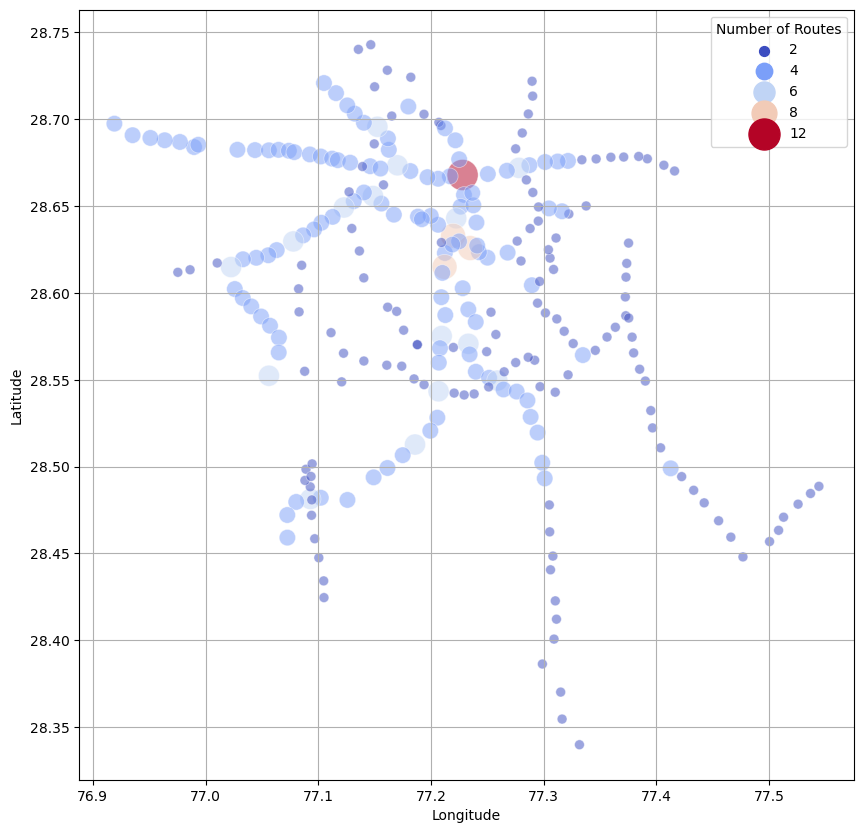

In [45]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=stop_route_counts,x='stop_lon',y='stop_lat',hue='number_of_routes',size='number_of_routes',
               sizes=(50,500),alpha=0.5,palette='coolwarm')

plt.legend(title='Number of Routes')
plt.grid(True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Summary of the above Graph 

The scatter plot above represents the number of routes that pass through each Delhi Metro stop. Stops are visualized in different colours and sizes based on the number of routes they connect, providing insights into the complexity of the network at various locations. Key observations are:

Hubs and Transfer Points: Larger circles (in warmer colours) indicate stops where multiple routes intersect. These stops serve as major transfer points within the network, facilitating easier cross-city travel for passengers.

Distribution: Stops with fewer routes, shown in cooler colours and smaller sizes, tend to be more peripheral or on less busy lines. The central areas and more populated zones have stops with greater connectivity.

## Now, let’s calculate the number of trips per time interval. It will give us a basic understanding of how service levels vary throughout the day. We’ll classify the intervals as:

In [46]:
# Conversion of arrival_time column 

In [47]:
import datetime as dt
def time_convert(time):
    try:
         return dt.datetime.strptime(time, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time.split(':'))
        return dt.time(hour % 24, minute, second)  

In [48]:
stop_times['arrival_time'] = stop_times['arrival_time'].apply(time_convert)

In [49]:
# stop_times.info()

In [50]:
stop_times.head(1)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,05:28:08,05:28:28,21,0,0,0,0.0,1


In [51]:
# stop_times.drop(columns=['time_interval'],inplace=True)

In [52]:
def time_interval(time):
    if time < dt.time(6,0):
        return 'Early Morning'
    elif time < dt.time(10,0):
        return 'Morning Peak'
    elif time < dt.time(16,0):
        return 'Midday'
    elif time < dt.time(20,0):
        return 'Evening Peak'
    else:
        return 'Late Evening'   

In [53]:
stop_times['time_interval'] = stop_times['arrival_time'].apply(time_interval)

In [54]:
stop_times.head(1)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,time_interval
0,0,05:28:08,05:28:28,21,0,0,0,0.0,1,Early Morning


In [55]:
# Counting the no_of_trips per time interval
trip_interval = stop_times.groupby('time_interval')['trip_id'].nunique().to_frame('no_of_trips').reset_index().sort_values(by='no_of_trips',ascending=True)
trip_interval

,time_interval,no_of_trips
0,Early Morning,200
4,Morning Peak,1280
2,Late Evening,1378
1,Evening Peak,1590
3,Midday,2152


In [56]:
trip_interval.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 3
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   time_interval  5 non-null      object
 1   no_of_trips    5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


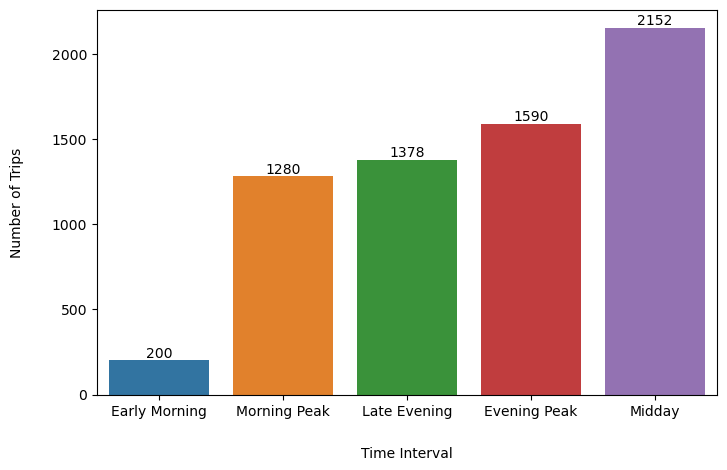

In [57]:
# Plotting of the Above Graph
plt.figure(figsize=(8,5))

ax = sns.barplot(data=trip_interval,x='time_interval',y='no_of_trips')

ax.bar_label(ax.containers[0])
plt.xlabel('Time Interval',labelpad=20)
plt.ylabel('Number of Trips',labelpad=20)
plt.show()

## The bar chart displays the number of trips scheduled for each time interval in the Delhi Metro system. From this visualization, we can observe the following: 

# Optimizing Operations to Reduce Overcrowding in Metro

# Now, as we have analyzed the dataset, let’s build a data-driven strategy to reduce the overcrowding in Delhi Metro. To reduce the overcrowding in the Delhi Metro, we can adjust No of Trains based on time interval analysis.

### We’ve already analyzed the number of trains during different time intervals, which provides a clear picture of the existing supply.adjustments can be made. For instance, if certain time intervals like the morning or evening peaks show signs of overcrowding, increasing the number of trains or adjusting the timing of the trains could help alleviate this issue.

### Let's begin by optimizing the number of trains running during peak and off-peak hours based on the trip frequency analysis we conducted earlier. I’ll create a hypothetical scenario where we adjust the frequencies during these times based on assumed passenger loads. An assumption here is that morning and evening peaks need a 20% increase in service, while midday and late evening might handle a 10% reduction without impacting passenger service negatively.

### Let’s calculate and visualize these adjustments:

In [58]:
#adjusting frequencies based on hypothetical scenario
adjusted_trips_per_interval = trip_interval.copy()

In [59]:
adjusted_trips_per_interval

,time_interval,no_of_trips
0,Early Morning,200
4,Morning Peak,1280
2,Late Evening,1378
1,Evening Peak,1590
3,Midday,2152


In [60]:
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}
# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['no_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

In [61]:
adjusted_trips_per_interval

,time_interval,no_of_trips,adjusted_number_of_trips
0,Early Morning,200,200
4,Morning Peak,1280,1536
2,Late Evening,1378,1240
1,Evening Peak,1590,1908
3,Midday,2152,1936


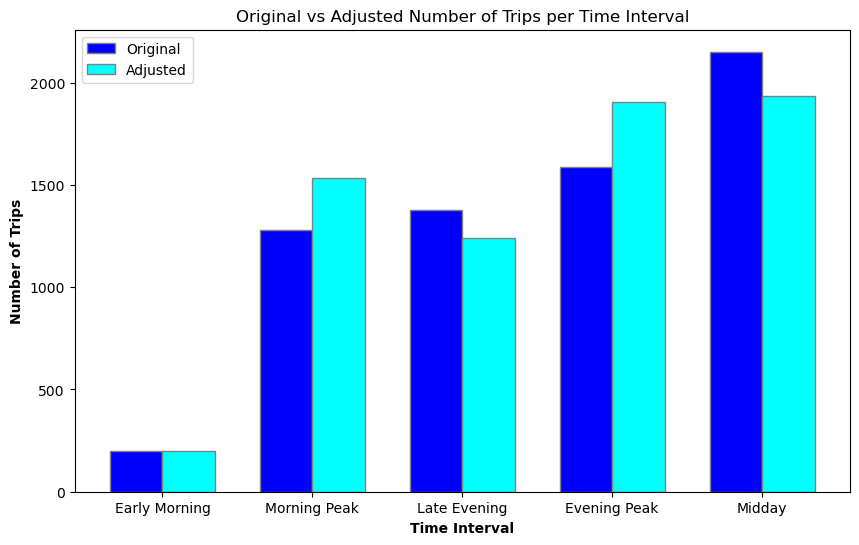

In [106]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['no_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()

plt.show()

### The bar chart shows the initial and modified number of trains per time interval for the Delhi Metro, reflecting our hypothetical adjustments to better match service levels with the estimated demand.

### Morning and Evening Peaks: We increased the number of trips by 20%, anticipating higher demand during these hours. This adjustment aims to reduce overcrowding and improve passenger comfort and service reliability

### Midday and Late Evening: We decreased the trips by 10%, assuming that the demand drops during these times, allowing for more efficient use of resources without significantly impacting service quality.

### By implementing these adjustments, Delhi Metro can potentially improve operational efficiency and customer satisfaction, especially during peak hours.